# Normal_Gravity_correction


Here, we show how to use 'boule' https://www.fatiando.org/boule/latest/ to correct normal gravity

See https://www.fatiando.org/harmonica/latest/user_guide/gravity_disturbance.html#gravity-disturbance and https://github.com/LL-Geo/PFToolbox/blob/master/Gravity%20disturbance%20and%20FAA.ipynb for more information

In [22]:
# Load necessary package 
import boule as bl
import pandas as pd
import pyproj
import matplotlib.pyplot as plt
import numpy as np

# Read in Gravity data after drift correction

In [23]:
#Read in Gravity data after drift correction
Data = pd.read_csv('Processed_Data.csv', delimiter=r',')

In [24]:
# Let's looks few line of the data
Data.head(5)

,Unnamed: 0,STATION,LINE,seconds_elapsed,GRAV.,Lon,Lat,Height_Ellipsoid_m,grav_drift
0,0,2.0,200.0,7297.0,3469.979333,116.221272,-31.521204,206.730,1.494362
1,1,2.0,300.0,7837.5,3470.032000,116.221281,-31.520428,209.068,1.547080
2,2,4.0,200.0,6495.0,3468.715500,116.220166,-31.521275,217.752,0.230452
3,3,4.0,300.0,8552.5,3469.611000,116.220229,-31.520332,216.532,1.126149
4,4,6.0,200.0,5695.0,3467.978333,116.219096,-31.521241,221.841,-0.506791


# Compute normal gravity at each location
Boule implements closed-form formula of Li & Gotze, 2001 which can calculate normal gravity at any latitude and (geometric) height.

Li, X. and H. J. Gotze, 2001, Tutorial: Ellipsoid, geoid, gravity, geodesy, and geophysics, Geophysics, 66(6), p. 1660-1668, doi:10.1190/1.1487109

In [28]:
normal_gravity = bl.WGS84.normal_gravity(Data.Lat, Data['Height_Ellipsoid_m'])
disturbance = Data['grav_drift'] - normal_gravity + 9.794e5 -22

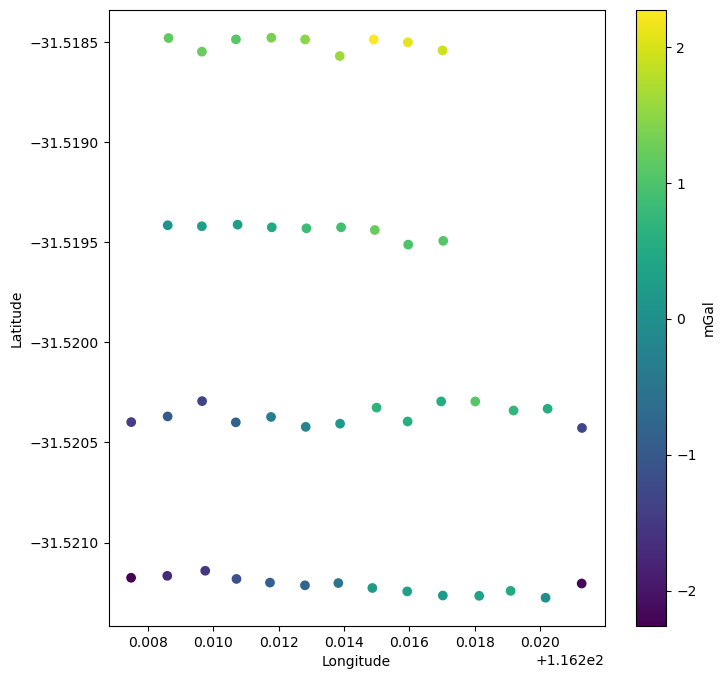

In [29]:
plt.figure(figsize=(8, 8))
# Scatter plot for Combine_data with color mapping based on 'GRAV.' values
sc = plt.scatter(Data['Lon'], Data['Lat'], c=disturbance, cmap='viridis')
# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Add colorbar to the plot
plt.colorbar(sc, label='mGal')
# Show the plot
plt.show()

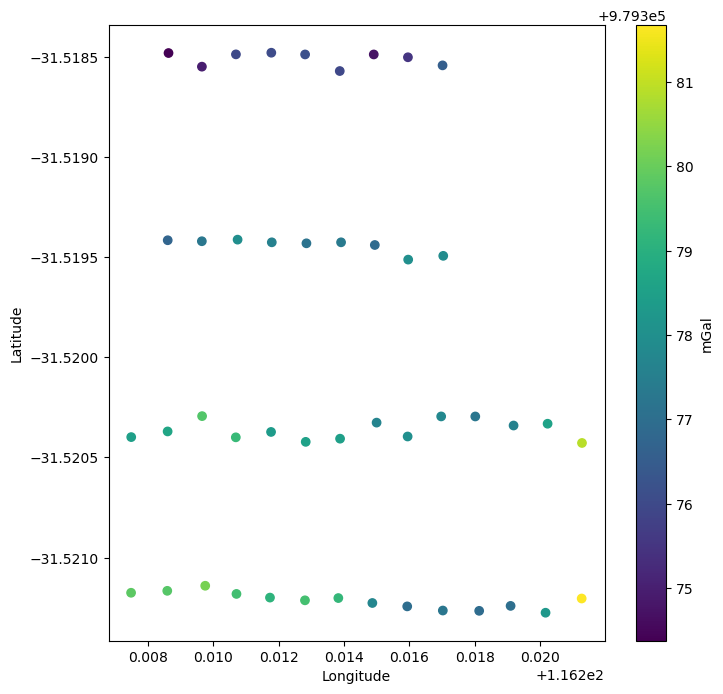

In [31]:
plt.figure(figsize=(8, 8))
# Scatter plot for Combine_data with color mapping based on 'GRAV.' values
sc = plt.scatter(Data['Lon'], Data['Lat'], c=normal_gravity, cmap='viridis')
# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Add colorbar to the plot
plt.colorbar(sc, label='mGal')
# Show the plot
plt.show()

In [34]:
# Save the Data to a CSV file
data_array = np.column_stack((Data['STATION'], Data['LINE'], Data['Lon'], Data['Lat'], Data['Height_Ellipsoid_m'], Data['grav_drift'], disturbance))
df = pd.DataFrame(data_array, columns=['STATION', 'LINE','Lon', 'Lat','Height_Ellipsoid', 'Total Gravity', 'Free Air Disturbance'])
df.to_csv('Free_Air_Grav_CAGE_FIELD.csv', index=False)

In [35]:
df

,STATION,LINE,Lon,Lat,Height_Ellipsoid,Total Gravity,Free Air Disturbance
0,2.0,200.0,116.221272,-31.521204,206.730,1.494362,-2.183071
1,2.0,300.0,116.221281,-31.520428,209.068,1.547080,-1.346266
2,4.0,200.0,116.220166,-31.521275,217.752,0.230452,-0.050988
3,4.0,300.0,116.220229,-31.520332,216.532,1.126149,0.544137
4,6.0,200.0,116.219096,-31.521241,221.841,-0.506791,0.476491
5,6.0,300.0,116.219187,-31.520341,219.737,0.322696,0.729118
6,8.0,200.0,116.218134,-31.521266,222.158,-0.726197,0.352938
7,10.0,200.0,116.217021,-31.521264,221.151,-0.601907,0.166561
8,12.0,200.0,116.215931,-31.521243,222.021,-0.738277,0.300363
9,14.0,200.0,116.214864,-31.521226,219.538,-0.048972,0.224710


In the next notebook, we will show how to remove topography signal to get Bouguer gravity (aka topography free disturbance)

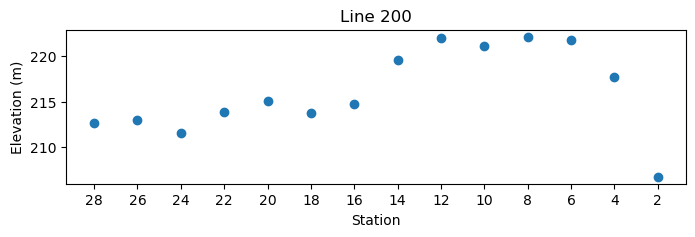

In [40]:
line_number=200 #You could change number in here to look different line

plt.figure(figsize=(8,2))
plt.scatter(df.STATION[df.LINE==line_number],df['Height_Ellipsoid'][df.LINE==line_number])
even_ticks = np.arange(2, 30, 2)
plt.xticks(even_ticks)

plt.xlabel('Station')
plt.ylabel('Elevation (m)')
plt.title('Line %d' %line_number)
plt.gca().invert_xaxis()

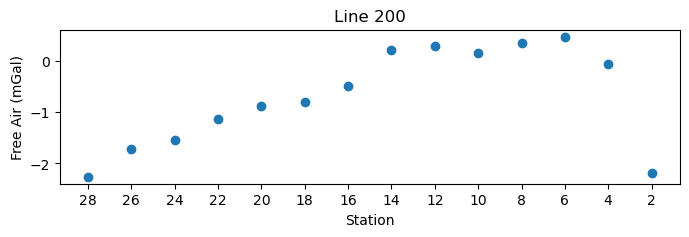

In [41]:
line_number=200 #You could change number in here to look different line

plt.figure(figsize=(8,2))
plt.scatter(df.STATION[df.LINE==line_number],df['Free Air Disturbance'][df.LINE==line_number])
even_ticks = np.arange(2, 30, 2)
plt.xticks(even_ticks)

plt.xlabel('Station')
plt.ylabel('Free Air (mGal)')
plt.title('Line %d' %line_number)
plt.gca().invert_xaxis()